PART-1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/products_100_rows (2).csv')
df.head()

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022


In [ ]:
df.shape

(100, 7)

In [ ]:
df.columns

Index(['Product', 'Category', 'Price Before', 'Price After', 'Weight Before',
       'Weight After', 'Date'],
      dtype='object')

In [ ]:
df.dtypes

,0
Product,object
Category,object
Price Before,float64
Price After,float64
Weight Before,float64
Weight After,float64
Date,object


In [ ]:
df.isnull().sum()

,0
Product,0
Category,0
Price Before,0
Price After,0
Weight Before,0
Weight After,0
Date,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Price Before,Price After,Weight Before,Weight After
count,100.000000,100.000000,100.000000,100.000000
mean,270.460800,243.526199,4.405000,4.570820
std,138.376012,124.029937,1.350802,1.414995
min,50.040000,42.891500,2.040000,2.070400
25%,149.642500,132.454050,3.347500,3.495725
50%,272.610000,248.351550,4.340000,4.499550
75%,396.617500,354.867800,5.482500,5.739025
max,499.080000,446.183000,6.980000,7.429000


PART-2 EDA

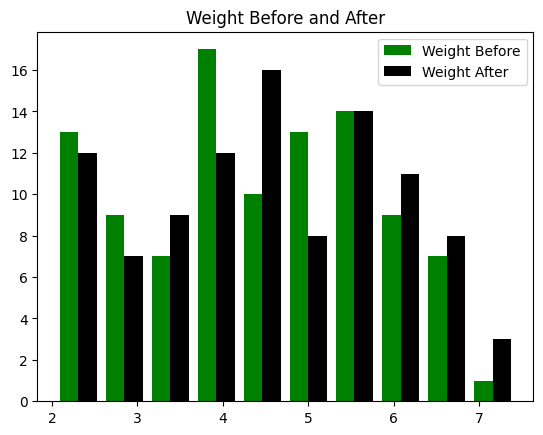

In [ ]:
import matplotlib.pyplot as plt
plt.hist([df['Weight Before'],df['Weight After']],bins=10,color=['green','black'],label=['Weight Before','Weight After'])
plt.legend()
plt.title('Weight Before and After')
plt.show()

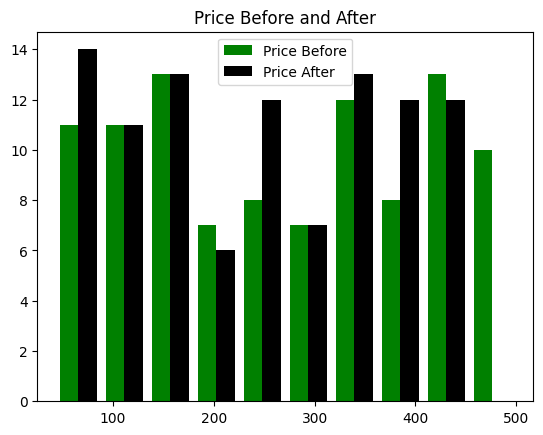

In [ ]:
import matplotlib.pyplot as plt
plt.hist([df['Price Before'],df['Price After']],bins=10,color=['green','black'],label=['Price Before','Price After'])
plt.legend()
plt.title('Price Before and After')
plt.show()

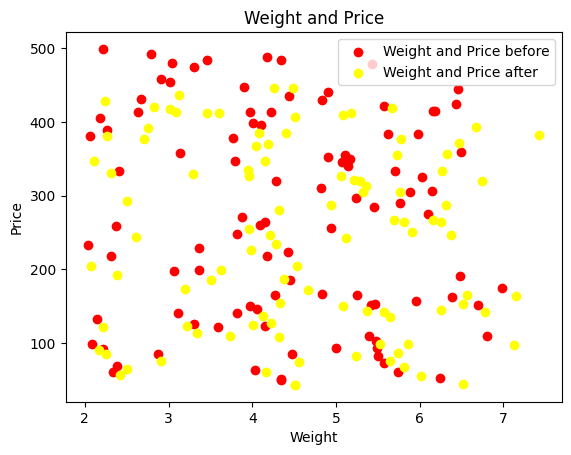

In [ ]:
plt.scatter(df['Weight Before'],df['Price Before'],color='red',label='Weight and Price before')
plt.scatter(df['Weight After'],df['Price After'],color='yellow',label='Weight and Price after')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price')
plt.show()

In [ ]:
df['weight_diff']=df['Weight After']-df['Weight Before']
max=df.groupby('Product')['weight_diff'].max()
max_prod=max.sort_values(ascending=False)
max_prod.head(3).index

Index(['Oreos', 'Cheese Its', 'Mountain Dew'], dtype='object', name='Product')

In [ ]:
df['price_diff']=df['Price After']-df['Price Before']
max=df.groupby('Product')['Price_diff'].max()
max_prod=max.sort_values(ascending=False)
max_prod.head(3).index

Index(['Rice Krispies', 'Corn Flakes', 'Mountain Dew'], dtype='object', name='Product')

PART 3-STATISTICS

In [ ]:
size_changes=df['Weight After']-df['Weight Before']
price_changes=df['Price After']-df['Price Before']
print(size_changes.mean())
print(size_changes.median())
print(size_changes.std())



0.16581999999999994
0.15225
0.121796666123453


In [ ]:
correlation = df['weight_diff'].corr(df['price_diff'])
print(correlation)

-0.05446499945982693


In [ ]:
shrinkflation_products = df[(df['weight_diff'] < 0) & (df['price_diff'] >= 0)]

# Calculate Probability
probability_shrinkflation = len(shrinkflation_products) / len(df)
print(probability_shrinkflation)


0.0


PART 4 FEATURE ENGINEERING

In [ ]:
Size_Change_Percentage = ((df['Weight After'] - df['Weight Before']) / df['Weight Before']) * 100
print(Size_Change_Percentage)


0      1.000000
1      7.000000
2      8.000000
3      7.000000
4     15.000000
        ...    
95     4.315789
96     3.277879
97     1.007009
98     1.220721
99     3.387097
Length: 100, dtype: float64


In [ ]:
Price_Change_Percentage = ((df['Price After'] - df['Price Before']) / df['Price Before']) * 100
print(abs(Price_Change_Percentage))

0      8.000000
1      4.000000
2     13.000000
3      4.000000
4     14.000000
        ...    
95     5.868403
96    12.161440
97    12.231301
98     6.281408
99     5.885302
Length: 100, dtype: float64


In [ ]:
df['Shrinkflation_Flag'] = (df['weight_diff'] < 0) & (df['price_diff'] >= 0)
display(df)

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,weight_diff,Price_diff,price_diff,Shrinkflation_Flag
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023,0.0517,-27.9784,-27.9784,False
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022,0.3836,-4.1268,-4.1268,False
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,0.2688,-29.7505,-29.7505,False
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022,0.3388,-17.1636,-17.1636,False
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022,0.9690,-62.2272,-62.2272,False
...,...,...,...,...,...,...,...,...,...,...,...
95,Pretzels,Snacks,347.50,327.1073,3.80,3.9640,08/27/2022,0.1640,-20.3927,-20.3927,False
96,Cheddar Cheese,Dairy,153.06,134.4457,5.47,5.6493,04/20/2022,0.1793,-18.6143,-18.6143,False
97,Cream,Dairy,319.41,280.3420,4.28,4.3231,08/01/2022,0.0431,-39.0680,-39.0680,False
98,Chips,Snacks,91.22,85.4901,2.22,2.2471,01/28/2022,0.0271,-5.7299,-5.7299,False


In [ ]:
Size_Change_Percentage = ((df['Weight After'] - df['Weight Before']) / df['Weight Before']) * 100
print(round(Size_Change_Percentage))

0      1.0
1      7.0
2      8.0
3      7.0
4     15.0
      ... 
95     4.0
96     3.0
97     1.0
98     1.0
99     3.0
Length: 100, dtype: float64


In [ ]:
Price_Change_Percentage = ((df['Price After'] - df['Price Before']) / df['Price Before']) * 100
print(abs(round(Price_Change_Percentage)))

0      8.0
1      4.0
2     13.0
3      4.0
4     14.0
      ... 
95     6.0
96    12.0
97    12.0
98     6.0
99     6.0
Length: 100, dtype: float64


TASK-5

In [ ]:
df['Weight_change_percentage'] = ((df['Weight After'] - df['Weight Before']) / df['Weight Before']) * 100
df['Price_change_percentage'] = ((df['Price After'] - df['Price Before']) / df['Price Before']) * 100
df.sort_values('Product')[['Product','Weight_change_percentage','Price_change_percentage','Shrinkflation_Flag']].reset_index(drop=True)

,Product,Weight_change_percentage,Price_change_percentage,Shrinkflation_Flag
0,Butter,1.190972,-10.523331,False
1,Butter,3.694158,-9.000240,False
2,Butter,4.663350,-11.596363,False
3,Butter,4.607251,-13.245848,False
4,Butter,2.238411,-8.969504,False
...,...,...,...,...
95,Whole Milk,8.000000,-13.000000,False
96,Yogurt,4.695811,-7.144141,False
97,Yogurt,1.415730,-12.452749,False
98,Yogurt,3.445887,-11.887991,False
